# Working with existing deployments

In [1]:
from skil import Skil, Service
from skil import get_workspace_by_id
from skil import get_experiment_by_id
from skil import get_model_by_id
from skil import get_deployment_by_id

skil_server = Skil(
    host      = 'localhost',
    port      = 9008,
    user_id   = 'admin',
    password  = 'Skymind'
)

Using TensorFlow backend.


'>>> Authenticating SKIL...'
'>>> Done!'


## Get deployment

In [2]:
workspace_id  = 'c34568a8-0947-4db4-943e-e801d1d4a43b'
experiment_id = 'yolo-experiment-01'
model_id      = 'yolo-model-01'
deployment_id = '1'

work_space = get_workspace_by_id(skil_server, workspace_id)

experiment = get_experiment_by_id(work_space, experiment_id)

deployment = get_deployment_by_id(skil_server, deployment_id)

model = get_model_by_id(experiment, model_id)

## Start service

In [3]:
service = Service(
    skil=skil_server,
    model=model,
    deployment=deployment,
    model_deployment=None
)

## Run YOLO-v2 Detection Inference

In [4]:
import skil, requests, cv2, json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Set configurations & temp image
threshold=0.5
needs_preprocessing=False
image_path='images/img-3.jpg'

url = 'http://{}/endpoints/{}/model/{}/v{}/detectobjects'.format(
    skil_server.config.host,
    deployment.name,
    model.name,
    model.version
)

response   = requests.post(
    url    = url,
    headers= skil_server.auth_headers,
    files  = {'file': open(image_path,'rb').read()},
    data   = {
        'id': model.id,
        'needs_preprocessing':needs_preprocessing,
        'threshold': threshold
    }
)
detections = response.json()
print(json.dumps(detections['objects'][0], indent=4))

{
    "height": 290.0,
    "predictedClasses": [
        "person",
        "horse",
        "umbrella",
        "handbag",
        "teddy bear",
        "dog",
        "elephant",
        "bottle",
        "backpack",
        "chair"
    ],
    "width": 105.0,
    "confidences": [
        0.9984509,
        0.0003896143,
        0.00022168506,
        0.00016007567,
        0.00012121937,
        6.202207e-05,
        3.9783445e-05,
        3.6805603e-05,
        3.272282e-05,
        3.252795e-05
    ],
    "centerY": 377.0,
    "centerX": 253.0,
    "predictedClassNumbers": [
        0,
        17,
        25,
        26,
        77,
        16,
        20,
        39,
        24,
        56
    ]
}


## Visualize detections

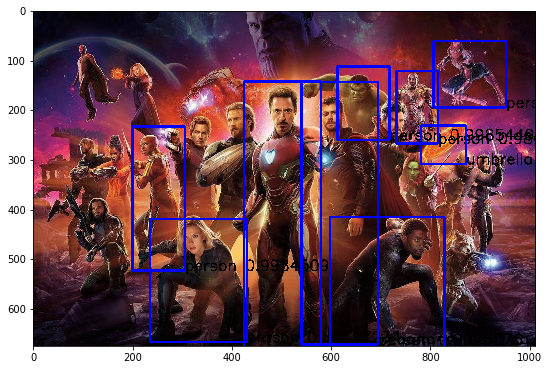

1: [person, 0.99845]
2: [person, 0.86417]
3: [person, 0.99596]
4: [person, 0.99751]
5: [person, 0.99854]
6: [horse, 0.69462]
7: [person, 0.9865]
8: [umbrella, 0.58607]
9: [person, 0.97941]


In [5]:
image = skil.utils.yolo.annotate_image(cv2.imread("images/img-3.jpg"), detections)

cv2.imwrite('images/annotated.jpg', image)

plt.figure(figsize=(9,9))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()
image.shape

for k, detection in enumerate(detections['objects']):
    predicted = detection['predictedClasses'][0]
    confidence = detection['confidences'][0]
    
    print('{}: [{}, {:.5}]'.format(k+1, predicted, confidence))